<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Matemática e Estatística Aplicada Para Data Science, Machine Learning e IA</font>
## <font color='blue'>Testes Estatísticos Não Paramétricos</font>

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
!pip install -q scikit-posthocs

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from scipy.stats import spearmanr
from scipy.stats import shapiro

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## O Que São Testes Não Paramétricos?

Veja o ebook no Capítulo 23 do curso com a definição completa.

## Quando Usar Testes Não Paramétricos?

Testes não paramétricos são uma ferramenta estatística essencial que você pode usar em diversas situações onde os testes paramétricos podem não ser adequados. Aqui estão alguns dos principais cenários e considerações para decidir quando usar testes não paramétricos:

1. Distribuição dos Dados

Quando os dados não seguem uma distribuição normal (ou qualquer outra distribuição específica assumida por testes paramétricos), os testes não paramétricos são uma opção viável. Isso é comum com amostras pequenas, onde é difícil verificar a normalidade, ou com dados que são claramente assimétricos ou têm outliers significativos.

2. Tamanho da Amostra

Testes não paramétricos são particularmente úteis em situações com amostras pequenas. Eles não dependem do Teorema Central do Limite, que é a base para muitos testes paramétricos que assumem uma distribuição normal nas amostras maiores. Assim, para amostras pequenas, testes não paramétricos podem fornecer análises mais confiáveis.

3. Nível de Medida dos Dados

Quando os dados são ordinais ou nominais (categóricos), os testes não paramétricos são geralmente necessários, pois os testes paramétricos geralmente requerem dados de intervalo ou de razão (numéricos) que suportem operações aritméticas como média e desvio padrão.

4. Robustez contra Violações de Suposições

Testes não paramétricos não são tão sensíveis a outliers e outros tipos de violações de suposições como homogeneidade de variâncias (homocedasticidade) que são críticas para testes paramétricos. Se você suspeita que seus dados podem violar essas suposições, os testes não paramétricos podem fornecer resultados mais confiáveis.

5. Modelagem de Dados

Em análises onde a forma funcional da relação entre variáveis não é conhecida ou é muito complexa, os métodos não paramétricos podem fornecer modelos flexíveis sem a necessidade de especificar uma forma funcional a priori, como é o caso da regressão não paramétrica (que aplicaremos no Projeto 9 do curso).

## Teste de Wilcoxon

O teste de Wilcoxon é uma alternativa não paramétrica ao teste t. Ele é usado para comparar duas amostras relacionadas quando não se pode assumir que a diferença entre as amostras segue uma distribuição normal. 

Vejamos um exemplo. Temos amostras de tamanhos de plantas antes e depois do uso de fertilizantes. Não conhecemos a distribuição dos dados.

In [5]:
# Gerando dados que não seguem uma distribuição normal

# Para reprodutibilidade
np.random.seed(42)  

# Dados antes de usar fertilizante
# Utilizando uma distribuição exponencial, comumente usada para modelar tempos de espera
dados_antes = np.random.exponential(scale = 10, size = 10) + 15  

# Dados depois de usar fertilizante
# Utilizando uma mistura de distribuições para aumentar a assimetria
dados_depois = np.concatenate([np.random.exponential(scale = 15, size = 5),  
                               np.random.exponential(scale = 5, size = 5)]) + 20  

# Adicionando um pequeno ruído para evitar zeros nas diferenças
ruído = np.random.normal(0, 0.01, size = dados_antes.shape)
dados_depois_modificados = dados_depois + ruído

In [6]:
print("Tamanho das Plantas Antes de Aplicar o Fertilizante:\n", dados_antes)

Tamanho das Plantas Antes de Aplicar o Fertilizante:
 [19.6926809  45.10121431 28.16745694 24.12942554 16.6962487  16.69596292
 15.59838769 35.11230864 24.19082154 27.31250062]


In [7]:
print("Tamanho das Plantas Depois de Aplicar o Fertilizante:\n", dados_depois_modificados)

Tamanho das Plantas Depois de Aplicar o Fertilizante:
 [20.30186131 72.5565046  46.78736291 23.56619134 23.02484132 21.01079935
 21.81444393 23.70539167 22.82224151 21.72222419]


In [8]:
# Teste de Shapiro-Wilk para verificar a normalidade
stat_A, p_A = shapiro(dados_antes)
stat_B, p_B = shapiro(dados_depois_modificados)

In [9]:
# Interpretando os resultados do Teste de Shapiro-Wilk

nivel_significancia = 0.05

if p_A > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade para a amostra A.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra A.")

if p_B > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade para a amostra B.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra B.")

Não há evidências suficientes para rejeitar a hipótese de normalidade para a amostra A.
Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra B.


In [10]:
# Aplicação do teste de Wilcoxon
stat, p = wilcoxon(dados_antes, dados_depois_modificados)

O teste de Wilcoxon testa duas hipóteses sobre as diferenças entre os pares de observações nas duas amostras relacionadas. Aqui estão as hipóteses:

**Hipótese Nula (H0)**: Não há diferença mediana entre os pares de grupos. Isso significa que a mediana das diferenças entre os pares de amostras é zero. Em termos mais técnicos, a hipótese nula afirma que a distribuição da diferença entre os pares é simétrica em torno de zero.

**Hipótese Alternativa (H1 ou Ha)**: Existe uma diferença mediana entre os pares de grupos. A mediana das diferenças entre os pares de amostras não é zero, indicando que uma das amostras tende a ter valores maiores ou menores que a outra. Esta hipótese pode ser bidirecional (simplesmente indicando que as medianas são diferentes) ou unidirecional (especificando se a mediana da primeira amostra é maior ou menor que a da segunda).

In [11]:
print("Estatística do Teste:", stat)
print("Valor-p:", p)

Estatística do Teste: 17.0
Valor-p: 0.322265625


In [12]:
# Interpretação do resultado
if p > 0.05:
    print("Não há evidências suficientes para rejeitar a hipótese nula (as medianas provavelmente são iguais).")
    print("Logo, não há diferença significativa no tamanho das plantas ao aplicar o fertilizante.")
else:
    print("Rejeita-se a hipótese nula (as medianas provavelmente são diferentes).")

Não há evidências suficientes para rejeitar a hipótese nula (as medianas provavelmente são iguais).
Logo, não há diferença significativa no tamanho das plantas ao aplicar o fertilizante.


## Teste Mann-Whitney

O Teste Mann-Whitney, também conhecido como Teste U de Mann-Whitney, é um teste estatístico  não  paramétrico  que  é  utilizado  para  comparar  duas  amostras  independentes.

### Exemplo 1

Neste exemplo, geramos duas amostras hipotéticas (amostra1 e amostra2) e aplicamos o Teste Mann-Whitney utilizando a função mannwhitneyu da biblioteca SciPy. O resultado inclui a estatística U e o valor-p. O valor-p é utilizado para determinar se há diferença significativa entre as distribuições das duas amostras. 

Se o valor-p for menor que o nível de significância estabelecido (geralmente 0,05), rejeita-se a hipótese nula e conclui-se que as distribuições das duas amostras são significativamente diferentes. Caso contrário, não se pode rejeitar a hipótese nula.

In [13]:
# Exemplo de duas amostras independentes
amostra1 = np.array([3, 5, 7, 9, 11, 15, 18, 21])
amostra2 = np.array([1, 4, 6, 8, 10, 12, 14, 16])

# H0: Não há diferença significativa entre as distribuições das amostras
# H1: As distribuições das amostras são significativamente diferentes

# Realiza o Teste Mann-Whitney
resultado = mannwhitneyu(amostra1, amostra2)

# Exibe o resultado
print("Estatística U:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

Estatística U: 38.0
Valor-p: 0.5737373737373737


**Conclusão do Exemplo 1:** O valor-p é maior que o nível de significância, logo falhamos em rejeitar a H0. Não há diferença significativa entre as distribuições das amostras.

### Exemplo 2

Neste exemplo, geramos duas amostras com distribuições normais distintas: amostra1 possui média 10 e desvio padrão 3, enquanto amostra2 possui média 14 e desvio padrão 2. Em seguida, aplicamos o Teste Mann-Whitney utilizando a função mannwhitneyu e exibimos os resultados.

Além disso, usamos a biblioteca Matplotlib para criar um histograma das duas amostras, a fim de visualizar as distribuições e verificar se são distintas.

O valor-p resultante do Teste Mann-Whitney pode ser usado para avaliar se as duas amostras têm distribuições significativamente diferentes, considerando um nível de significância pré-estabelecido (como 0,05). Se o valor-p for menor que o nível de significância, rejeita-se a hipótese nula e conclui-se que as distribuições são significativamente diferentes.

Estatística U: 243.0
Valor-p: 4.6008399005444884e-14


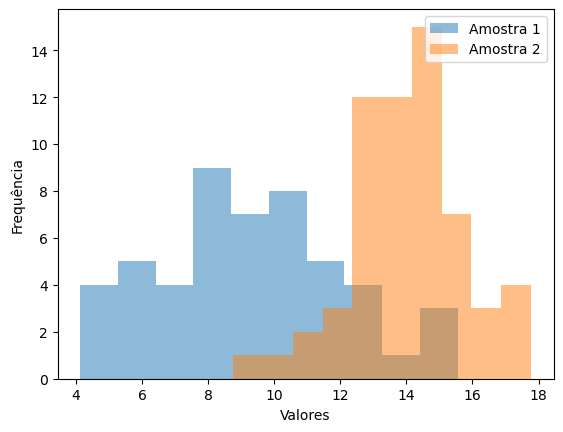

In [14]:
# Gera duas amostras com distribuições diferentes
np.random.seed(42)
amostra1 = np.random.normal(loc = 10, scale = 3, size = 50)
amostra2 = np.random.normal(loc = 14, scale = 2, size = 60)

# H0: Não há diferença significativa entre as distribuições das amostras
# H1: As distribuições das amostras são significativamente diferentes

# Realiza o Teste Mann-Whitney
resultado = mannwhitneyu(amostra1, amostra2)

# Exibe o resultado
print("Estatística U:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

# Visualiza as distribuições das amostras
plt.hist(amostra1, bins = 10, alpha = 0.5, label = "Amostra 1")
plt.hist(amostra2, bins = 10, alpha = 0.5, label = "Amostra 2")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.legend(loc="upper right")
plt.show()

**Conclusão do Exemplo 2:** O valor-p é menor que o nível de significância, logo podemos rejeitar a H0. As distribuições das amostras são significativamente diferentes.

## Teste Kruskal-Wallis
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
O teste de Kruskal-Wallis é um exemplo de teste não paramétrico usado como alternativa à ANOVA. Ele compara as distribuições de três ou mais grupos independentes, semelhante ao teste de Mann-Whitney. O teste de Kruskal-Wallis não assume normalidade dos dados nem homocedasticidade, tornando-se uma opção mais robusta em comparação à ANOVA quando as suposições não são atendidas.

### Exemplo 1

Neste exemplo, utilizamos três amostras hipotéticas e aplicamos o Teste de Kruskal-Wallis usando a função kruskal da biblioteca SciPy. O resultado inclui a estatística H e o valor-p. O valor-p é utilizado para determinar se há diferença significativa entre as distribuições das amostras. Se o valor-p for menor que o nível de significância estabelecido (geralmente 0,05), rejeita-se a hipótese nula e conclui-se que as distribuições das amostras são significativamente diferentes. Caso contrário, não se pode rejeitar a hipótese nula.

In [15]:
# Exemplo de três amostras independentes
amostra1 = np.array([3, 5, 7, 9, 11, 15, 18, 21])
amostra2 = np.array([1, 4, 6, 8, 10, 12, 14, 16])
amostra3 = np.array([2, 3, 5, 7, 11, 13, 17, 19])

# H0: Não há diferença significativa entre as distribuições das amostras
# H1: As distribuições das amostras são significativamente diferentes

# Realiza o Teste de Kruskal-Wallis
resultado = kruskal(amostra1, amostra2, amostra3)

# Exibe o resultado
print("Estatística H:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

Estatística H: 0.48584494773519105
Valor-p: 0.784332317665689


**Conclusão do Exemplo 1:** O valor-p é maior que o nível de significância, logo não podemos rejeitar a H0. Não há diferença significativa entre as distribuições das amostras.

### Exemplo 2

Neste exemplo, geramos três amostras com distribuições normais distintas: amostra1 possui média 10 e desvio padrão 3, amostra2 possui média 15 e desvio padrão 2, e amostra3 possui média 18 e desvio padrão 4. Em seguida, aplicamos o Teste de Kruskal-Wallis utilizando a função kruskal e exibimos os resultados.

Além disso, usamos a biblioteca Matplotlib para criar um histograma das três amostras, a fim de visualizar as distribuições e verificar se são distintas.

O valor-p resultante do Teste de Kruskal-Wallis pode ser usado para avaliar se as três amostras têm distribuições significativamente diferentes, considerando um nível de significância preestabelecido (como 0,05). Se o valor-p for menor que o nível de significância, rejeita-se a hipótese nula e conclui-se que as distribuições são significativamente diferentes.

Estatística H: 64.19345911949694
Valor-p: 1.1496548215758738e-14


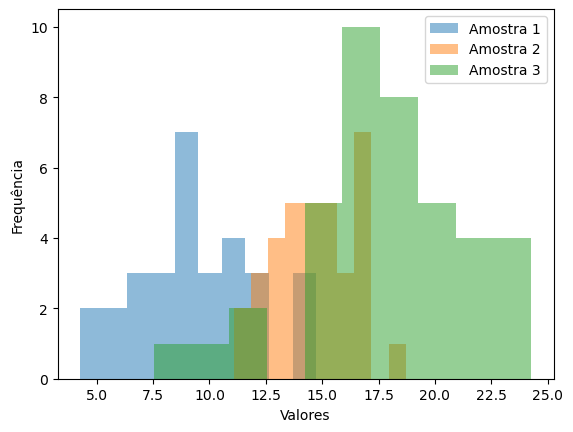

In [16]:
# Gera três amostras com distribuições diferentes
np.random.seed(42)
amostra1 = np.random.normal(loc = 10, scale = 3, size = 30)
amostra2 = np.random.normal(loc = 15, scale = 2, size = 35)
amostra3 = np.random.normal(loc = 18, scale = 4, size = 40)

# H0: As distribuições das amostras não são significativamente diferentes
# H1: As distribuições das amostras são significativamente diferentes

# Realiza o Teste de Kruskal-Wallis
resultado = kruskal(amostra1, amostra2, amostra3)

# Exibe o resultado
print("Estatística H:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

# Visualiza as distribuições das amostras
plt.hist(amostra1, bins = 10, alpha = 0.5, label = "Amostra 1")
plt.hist(amostra2, bins = 10, alpha = 0.5, label = "Amostra 2")
plt.hist(amostra3, bins = 10, alpha = 0.5, label = "Amostra 3")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.legend(loc = "upper right")
plt.show()

**Conclusão do Exemplo 2:** O valor-p é menor que o nível de significância, logo podemos rejeitar a H0. As distribuições das amostras, provavelmente, são diferentes.

## Teste de Dunn

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->O teste de Dunn é um teste estatístico não paramétrico usado para análise post-hoc após um teste de Kruskal-Wallis. Quando o teste de Kruskal-Wallis rejeita a hipótese nula, indicando diferenças significativas entre três ou mais grupos, o teste de Dunn é usado para identificar quais pares de grupos têm diferenças significativas. O teste de Dunn é uma alternativa ao teste de comparações múltiplas de Tukey (HSD) usado na análise post-hoc após ANOVA.

Neste exemplo, geramos três amostras com distribuições normais distintas e realizamos o Teste de Kruskal-Wallis. Se o resultado do Teste de Kruskal-Wallis rejeitar a hipótese nula (valor-p < 0,05), prosseguimos com o Teste de Dunn usando a função posthoc_dunn da biblioteca scikit-posthocs.

O resultado do teste de Dunn é uma matriz que mostra os valores-p corrigidos para cada par de comparações entre os grupos. A correção de Bonferroni é aplicada para ajustar os valores-p, levando em consideração o problema das comparações múltiplas. Se o valor-p corrigido para uma comparação específica for menor que o nível de significância estabelecido (geralmente 0,05), conclui-se que há uma diferença.

In [17]:
# Gera três amostras com distribuições diferentes
np.random.seed(42)
amostra1 = np.random.normal(loc = 10, scale = 3, size = 30)
amostra2 = np.random.normal(loc = 15, scale = 2, size = 35)
amostra3 = np.random.normal(loc = 18, scale = 4, size = 40)

# Realiza o Teste de Kruskal-Wallis
resultado = kruskal(amostra1, amostra2, amostra3)
print("Estatística H:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

# Se o Teste de Kruskal-Wallis rejeitar a hipótese nula, realiza o Teste de Dunn
if resultado.pvalue < 0.05:
    
    # Combina as amostras em um único DataFrame
    df1 = pd.DataFrame({"Valores": amostra1, "Grupo": "Amostra 1"})
    df2 = pd.DataFrame({"Valores": amostra2, "Grupo": "Amostra 2"})
    df3 = pd.DataFrame({"Valores": amostra3, "Grupo": "Amostra 3"})
    dados = pd.concat([df1, df2, df3])

    # Realiza o Teste de Dunn
    resultado_dunn = sp.posthoc_dunn(dados, val_col = "Valores", group_col = "Grupo", p_adjust = "bonferroni")
    print("\nResultados do Teste de Dunn:")
    print(resultado_dunn)

Estatística H: 64.19345911949694
Valor-p: 1.1496548215758738e-14

Resultados do Teste de Dunn:
              Amostra 1  Amostra 2     Amostra 3
Amostra 1  1.000000e+00   0.000013  3.446265e-15
Amostra 2  1.258889e-05   1.000000  1.935620e-03
Amostra 3  3.446265e-15   0.001936  1.000000e+00


O Teste de Dunn avalia as seguintes hipóteses para cada par de grupos:

- Hipótese Nula (H0): A mediana dos dois grupos sendo comparados é igual. Não há diferença significativa entre os grupos.
- Hipótese Alternativa (H1): A mediana dos dois grupos não é igual. Há uma diferença significativa entre os grupos.

Interpretação:

- Amostra 1 vs Amostra 2: Rejeitamos a H0. O valor-p indica que há uma diferença significativa entre as medianas da Amostra 1 e da Amostra 2.

- Amostra 1 vs Amostra 3: Rejeitamos a H0. O valor-p é extremamente baixo, indicando uma diferença altamente significativa entre as medianas da Amostra 1 e da Amostra 3.

- Amostra 2 vs Amostra 3: Rejeitamos a H0. O valor-p também sugere uma diferença significativa entre as medianas da Amostra 2 e da Amostra 3.

Portanto, todas as comparações entre os grupos mostraram diferenças significativas entre suas medianas, com os valores-p muito abaixo do nível típico de significância (0.05), mesmo após o ajuste de Bonferroni. Isso confirma que as diferenças observadas no Teste de Kruskal-Wallis são estatisticamente robustas e que cada grupo tem uma mediana distinta dos outros.

Nota: O ajuste de Bonferroni é uma técnica usada em estatística para controlar o problema do aumento da taxa de erro do tipo I que ocorre quando múltiplos testes de hipóteses são realizados simultaneamente. O erro do tipo I acontece quando uma hipótese nula verdadeira é incorretamente rejeitada, isto é, quando se conclui que existe um efeito quando, na verdade, ele não existe.

## Teste de Friedman 

Teste de Friedman é um teste estatístico não paramétrico usado para detectar diferenças nas distribuições de três ou mais amostras pareadas. É útil especialmente quando os dados não cumprem as premissas de normalidade. Este teste é frequentemente usado em análises de dados provenientes de experimentos de medidas repetidas.

In [18]:
# Dados de exemplo: três grupos com medidas pareadas
# Cada coluna representa um grupo, e cada linha representa um indivído, por exemplo
data = np.array([
    [7, 6, 8],
    [6, 5, 7],
    [8, 7, 9],
    [5, 4, 6],
    [6, 6, 8]
])

# Separando os dados por grupos
group1 = data[:, 0]
group2 = data[:, 1]
group3 = data[:, 2]

# Realizando o Teste de Friedman
stat, p = friedmanchisquare(group1, group2, group3)

print('Estatística do teste:', stat)
print('P-valor:', p)

# Interpretando o resultado
if p > 0.05:
    print('Falhamos em rejeitar a H0. Não há diferença significativa entre as medianas.')
else:
    print('Rejeita-se a hipótese nula (as medianas provavelmente são diferentes).')

Estatística do teste: 9.578947368421062
P-valor: 0.00831683351100441
Rejeita-se a hipótese nula (as medianas provavelmente são diferentes).


## Estatística Spearman Rank

A estatística Spearman Rank, ou coeficiente de correlação de postos de Spearman, é uma medida não paramétrica da correlação entre duas variáveis. Ela avalia o quão bem a relação entre as duas variáveis pode ser descrita usando uma função monotônica, ou seja, se uma variável aumenta, a outra também aumenta, e se uma diminui, a outra também diminui.

### Exemplo 1
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
Neste exemplo, criamos duas variáveis x e y, e utilizamos a função spearmanr da biblioteca SciPy para calcular o coeficiente de correlação de Spearman e o valor-p associado. O valor-p pode ser usado para testar a hipótese nula de que a correlação de Spearman entre as duas variáveis é zero. Se o valor-p for menor que o nível de significância estabelecido (geralmente 0,05), rejeita-se a hipótese nula e conclui-se que existe uma correlação significativa entre as variáveis.

In [19]:
# Exemplo de dados
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calcula a correlação de Spearman
coeficiente, p_valor = spearmanr(x, y)

# Exibe o resultado
print("Coeficiente de correlação de Spearman:", coeficiente)
print("Valor-p:", p_valor)

Coeficiente de correlação de Spearman: 1.0
Valor-p: 0.0


O valor-p reportado como 0.0 (pode ser um valor muito pequeno que é arredondado para zero) sugere que a probabilidade de obter uma correlação de Spearman tão extrema como 1.0 sob a hipótese nula (que não há associação entre as variáveis) é extremamente baixa. Este resultado é estatisticamente significativo, o que significa que você pode rejeitar a hipótese nula de que não existe uma correlação monotônica entre x e y.

### Exemplo 2

Neste exemplo, geramos duas variáveis x e y, onde y é uma função linear de x com ruído gaussiano adicionado. Além disso, adicionamos um ruído não linear usando a função seno para tornar a relação entre x e y menos linear.

Calculamos a correlação de Spearman entre as variáveis usando a função spearmanr da biblioteca SciPy e exibimos o coeficiente de correlação e o valor-p. Em seguida, usamos a biblioteca Matplotlib para criar um gráfico de dispersão das variáveis, mostrando a relação entre elas.

A correlação de Spearman neste exemplo será capaz de capturar a relação monotônica entre as variáveis, apesar da relação não ser estritamente linear.

Coeficiente de correlação de Spearman: 0.30741074107410743
Valor-p: 0.001863541153704252


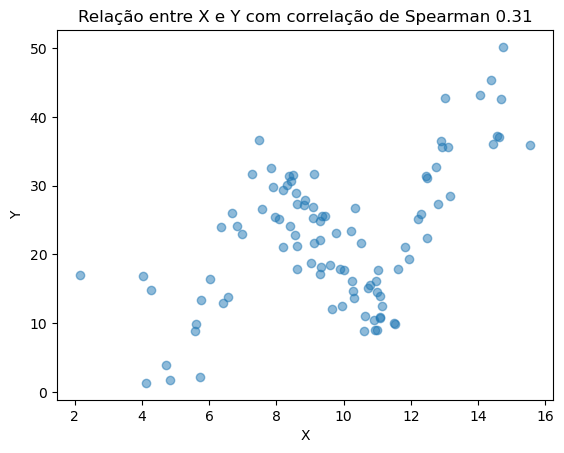

In [20]:
# Gera dados aleatórios
np.random.seed(42)
x = np.random.normal(loc = 10, scale = 3, size = 100)
y = 2 * x + 3 + np.random.normal(loc = 0, scale = 5, size = 100)

# Adiciona ruído não linear para tornar a relação menos linear
y = y + 10 * np.sin(x)

# Calcula a correlação de Spearman
coeficiente, p_valor = spearmanr(x, y)

# Exibe o resultado
print("Coeficiente de correlação de Spearman:", coeficiente)
print("Valor-p:", p_valor)

# Visualiza a relação entre as variáveis
plt.scatter(x, y, alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Relação entre X e Y com correlação de Spearman {:.2f}".format(coeficiente))
plt.show()

O valor-p de aproximadamente 0.0019 é muito baixo e, tipicamente, um resultado como este seria considerado estatisticamente significativo (normalmente, compara-se com um nível de significância de 0.05 ou 0.01). Isso significa que há evidências estatísticas suficientes para rejeitar a hipótese nula de que não existe correlação monotônica entre as variáveis.

In [21]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [22]:
#%watermark -v -m

In [23]:
#%watermark --iversions

# Fim